In [1]:
import sys
from pathlib import Path

_BASE_DIR = Path().resolve().parent.parent
print("(!) Make sure this dir is project directory: ", _BASE_DIR)
sys.path.append(str(_BASE_DIR))


(!) Make sure this dir is project directory:  /home/ars/Desktop/university/bsu-nn


In [2]:
from utils.settings import get_in_out_dirs

_LAB_NAME = "lab7"

INPUT_DIR, OUTPUT_DIR = get_in_out_dirs(base_name=_LAB_NAME)

OUT_MODEL_DIR = OUTPUT_DIR / "model"
OUT_MODEL_DIR.mkdir(parents=True, exist_ok=True)

DATA_DIR = INPUT_DIR / "data"
DATA_DIR.mkdir(parents=True, exist_ok=True)

# Лабораторная 7: Сверточные нейронные сети и использование VGG16


## Задание 1

Выполните базовую версию программы обучения сверточной нейронной сети распознавания изображений.  
Попытайтесь улучшить качество обучения сети путем изменения гиперпараметров.  
Сохраните обученую сеть.


In [5]:
from utils.mnist import get_mnist_model

mnist_model = get_mnist_model()

Загружена предобученная модель


## Задание 2 

Загрузите сохраненную сверточную нейронную сеть распознавания изображений.


***Выполнено в п.1***

## Задание 3

***Выполнено в прошлой лабораторной***


## Задание 4.1 (== Лаб 8.1.1)

Используйте обученные сверточные сети для распознавания своих объектов и рукописных цифр.


In [13]:
import os

# Загружаем своё изображение
my_image_path = os.path.join(DATA_DIR, "3.png")
os.path.exists(my_image_path)

True

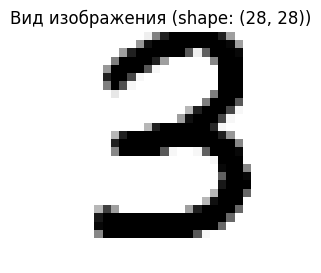

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
0: 0.0%
1: 0.0%
2: 0.0%
3: 98.0%
4: 0.0%
5: 2.0%
6: 0.0%
7: 0.0%
8: 0.0%
9: 0.0%
Предсказанный результат: 3


np.int64(3)

In [14]:
from utils.mnist import predict_mnist_image

predict_mnist_image(model=mnist_model, pic_path=my_image_path)

## Задание 4.2 (== Лаб 8.1.2)

Используйте предварительно обученную сеть VGG16 в Keras для распознавания своего изображения.


In [46]:
import os

# Загружаем своё изображение
vgg_img_path = os.path.join(DATA_DIR, "vgg.png")
os.path.exists(my_image_path)

True

In [47]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

# Загружаем предобученную модель VGG16
vgg_model = VGG16(weights='imagenet')

# Загружаем картинку в нужном формате (224x224, RGB)
img = image.load_img(vgg_img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Предсказание
preds = vgg_model.predict(x)

# Декодируем в читаемые метки
print("Топ-5 предсказаний:")
for pred in decode_predictions(preds, top=5)[0]:
    print(f"{pred[1]} ({pred[2]*100:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
Топ-5 предсказаний:
Siamese_cat (61.97%)
tabby (9.84%)
Egyptian_cat (6.59%)
Persian_cat (6.00%)
lynx (4.61%)
